## Машинное обучение в задачах кредитного скоринга.

**Цели:**
1. Построить модель машинного обучения, позволяющую определить, испытает ли заемщик трудности в ближащие два года, вследствие чего платеж будет просрочен, на основе начальных данных из обучающей выборки;
2. Проверить и оценить качество построенной модели на основе тестовой выборки.

**Задачи:**
1. Ознакомиться с данными;
2. Провести предобработку данных;
3. Определить концепцию будущей модели;
4. Построить модель кредитного скоринга;
5. Оценить качество созданной модели с помощью тестовой выборки;
6. Сделать выводы о применимости модели.

**Ожидаемые результаты:**

Модель, способная предсказать наступление дефолта у заемщика, то есть спрогнозировать риск банка при выдачи кредита клиенту.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**1. Ознакомимся с данными**

Описание данных:\
В датасете представлена информация по клиентам и их кредитным историям.\
Всего он содержит 11 столбцов, где\
SeriousDlqin2yrs - результативный признак, означающий, что клиент, взявший кредит, допустит просрочку платежа на 90 дней и больше

In [2]:
description = pd.read_excel(r"C:\Users\nikal\OneDrive\Рабочий стол\Учеба\4 семестр\Курсовая работа\Data Dictionary.xlsx", index_col = 'Имя столбца')
description

,Описание,Тип данных
Имя столбца,,
SeriousDlqin2yrs,"Лицо, допустившее просрочку платежа на 90 дней...",int
RevolvingUtilizationOfUnsecuredLines,Общий баланс по кредитным картам и личным кред...,float
age,Возраст заемщика в годах,int
NumberOfTime30-59DaysPastDueNotWorse,Количество случаев просрочки платежа заемщиком...,int
DebtRatio,"Ежемесячные выплаты по долгам, алименты, расхо...",float
MonthlyIncome,Ежемесячный доход,float
NumberOfOpenCreditLinesAndLoans,"Количество открытых кредитов (в рассрочку, нап...",int
NumberOfTimes90DaysLate,Количество случаев просрочки платежа заемщиком...,int
NumberRealEstateLoansOrLines,Количество ипотечных кредитов и кредитов на не...,int


In [3]:
df = pd.read_csv(r"C:\Users\nikal\OneDrive\Рабочий стол\Учеба\4 семестр\Курсовая работа\cs-training.csv", index_col = 'Unnamed: 0')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


**2. Проведем предобработку данных**

Можем заметить, что в столбце DebtRatio максимальное значение больше 1, чего быть не может, потому что фактор показывает долю. К тому же в строках, где DebtRatio сильно больше 1, остутствуют значения ежемесячного дохода, поэтому перемстим значения в нужный столбец

In [7]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)
dop = df['DebtRatio'][(df['MonthlyIncome'] == 0)]
debt_mean = df['DebtRatio'][df['DebtRatio'] < 1].median()
df['DebtRatio'][(df['MonthlyIncome'] == 0) | (df['DebtRatio'] > 1)] = debt_mean
df['MonthlyIncome'][(df['MonthlyIncome'] == 0)] = dop

В столбце NumberOfDependents есть пропущенные значения, которые нам необходимо заменить.
Произведем замену на медианное значение

In [8]:
df = df.fillna(df.median())

<AxesSubplot:>

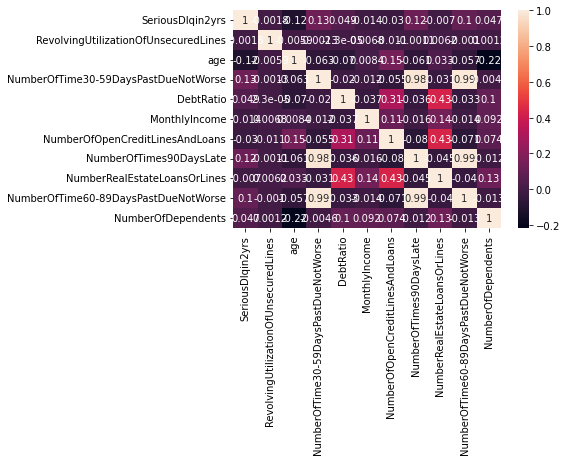

In [10]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

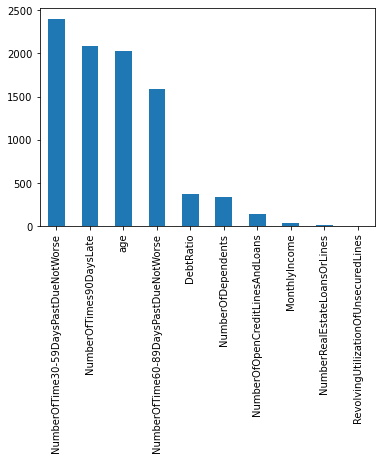

In [11]:
v = pd.Series(f_classif(df.iloc[:, 1:], df.iloc[:, 0])[0], index=df.iloc[:, 1:].columns)
v.sort_values(inplace=True, ascending=False)
v.plot(kind="bar")

Заметим, что RevolvingUtilizationOfUnsecuredLines почти не вносит вклад в результирующую переменную, поэтому удалим этот фактор из модели

In [12]:
df.drop(['RevolvingUtilizationOfUnsecuredLines'], axis = 1, inplace=True)

Поменяем тип столбца NumberOfDependents на int, так как этот признак несет в себе смысл количества человек

In [13]:
df['NumberOfDependents'] = df['NumberOfDependents'].astype('int64')

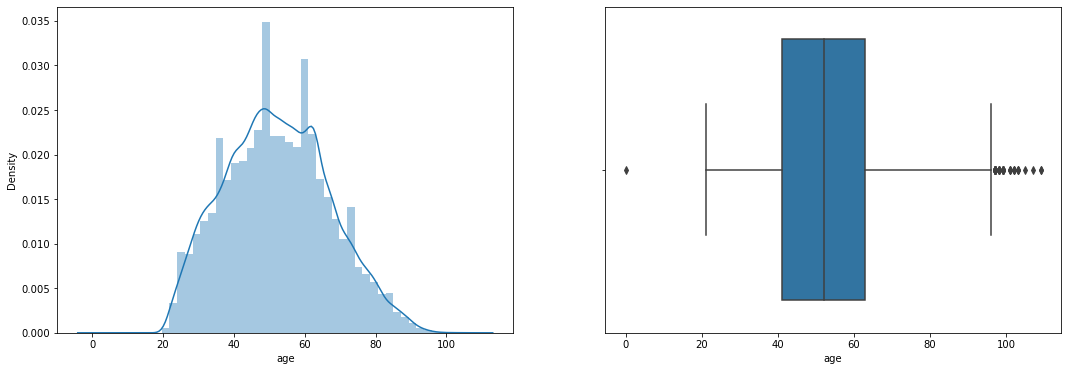

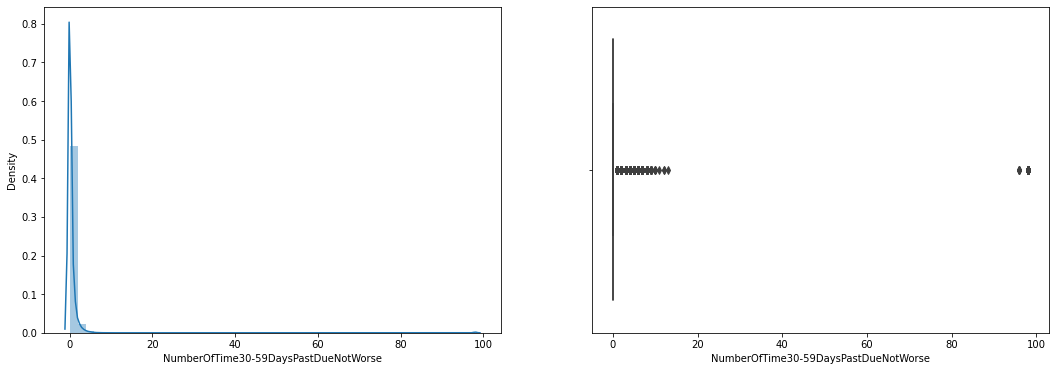

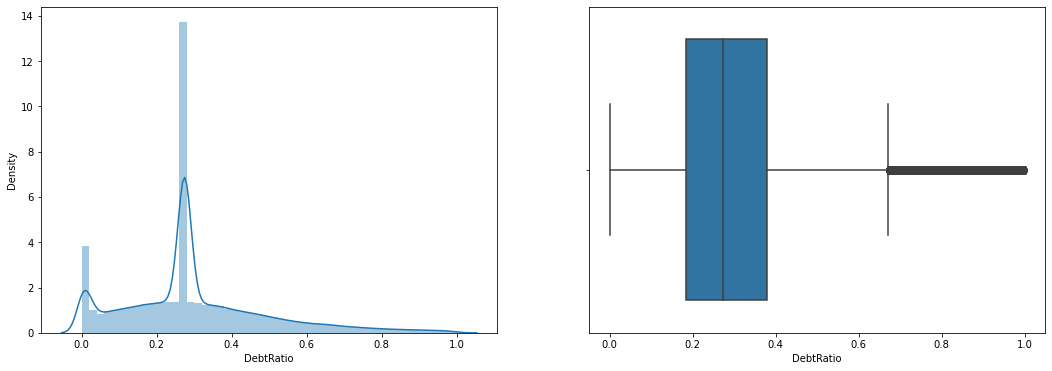

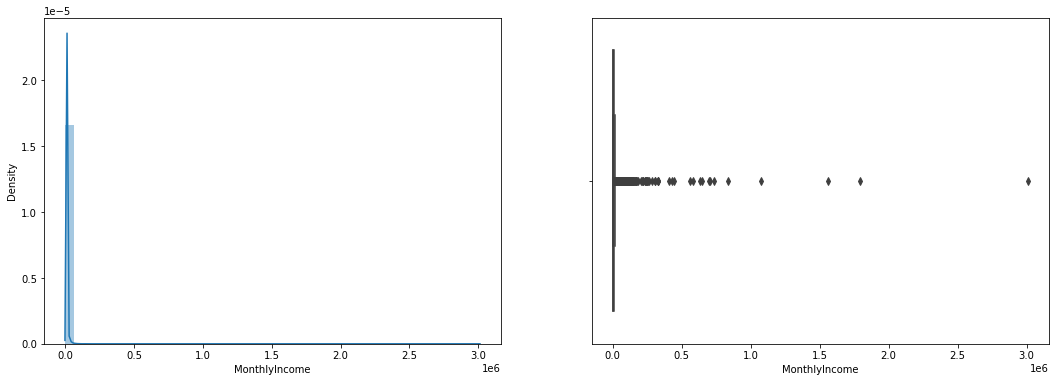

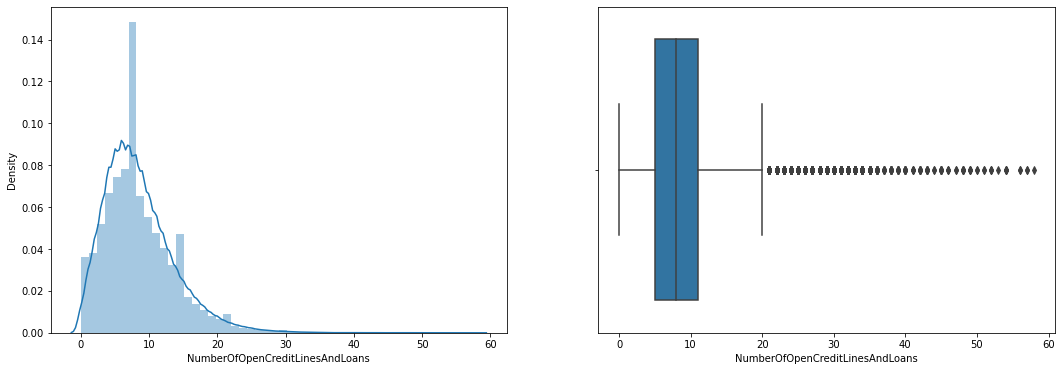

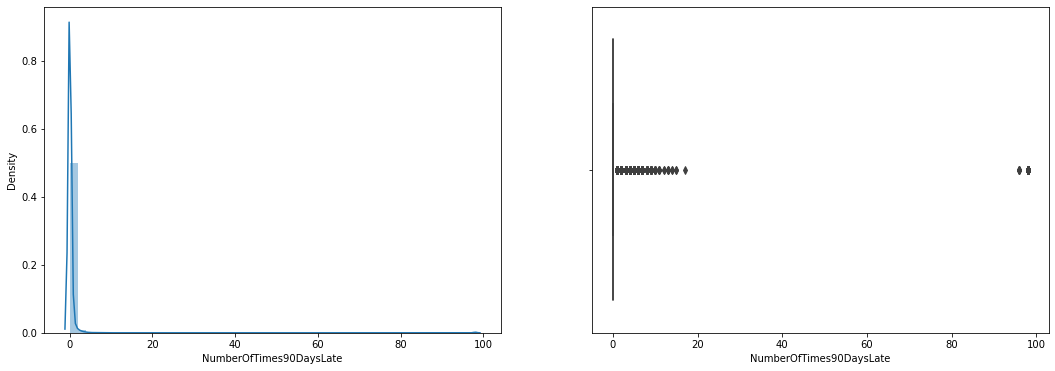

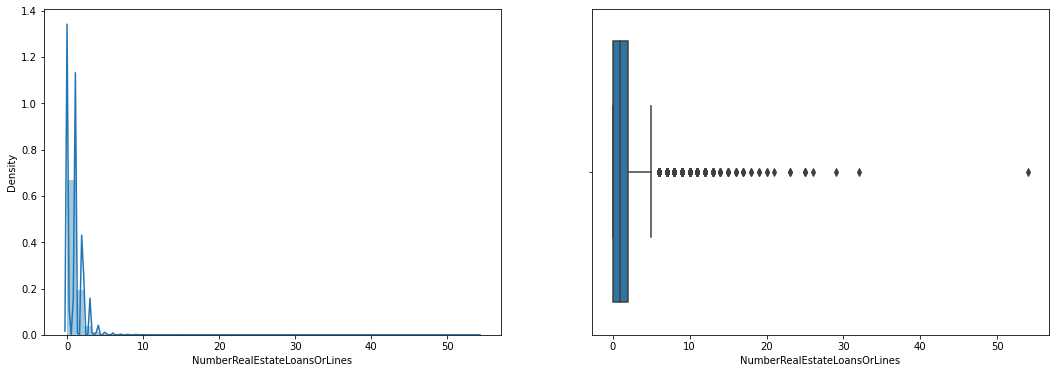

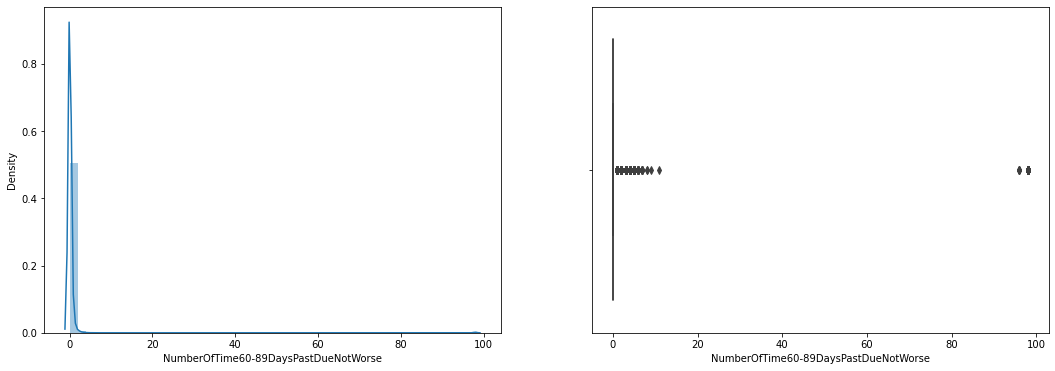

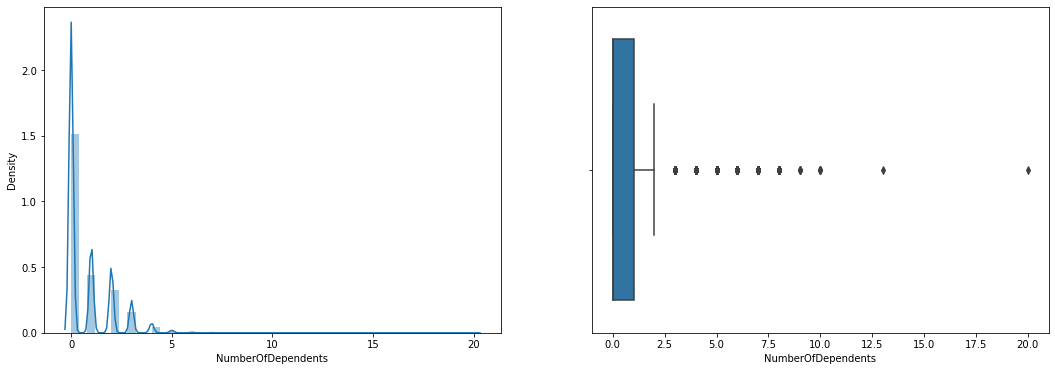

In [14]:
for i in list(df.columns)[1:]:
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    sns.distplot(df[i], ax = ax[0])
    sns.boxplot(df[i], ax = ax[1])

По боксплотам можно заметить наличие выбросов, поэтому очистим обучающую выборку для построения более эффективной модели. Но из-за преобладания каких-то определнных значений в признаках, проведем эту операцию не для все столбцов

In [15]:
del_col = ['age', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

In [16]:
Q1 = df[del_col].quantile(q=0.25)
Q3 = df[del_col].quantile(q=0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
ind = (np.array(df[del_col] <= upper).all(axis = 1) & np.array(df[del_col] >= lower).all(axis = 1))
df = df[ind]


Для столбцов NumberOfTimes60DaysLate и NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate удалим экстремально большие значения, выявленные по боксплотам. Также поставим условия для столбца возраст, что клиент не может быть младше 20 лет.

In [18]:
df = df[(df['NumberOfTime60-89DaysPastDueNotWorse'] < 20) &
        (df['NumberOfTime30-59DaysPastDueNotWorse'] < 20) &
        (df['NumberOfTimes90DaysLate'] < 30) &
        (df['age'] > 20)]

In [19]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

В датасете разные единицы измерения у столбцов, что может повлиять на качество модели, поэтому нормализуем столбцы.

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
X_ = min_max_scaler.fit_transform(X)

<AxesSubplot:>

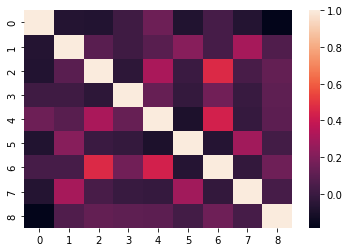

In [21]:
sns.heatmap(pd.DataFrame(X_).corr())

Основываясь на корреляционной матрице, можно сказать, что мультиколлинеарность отсутствует

Разделим датасет на обучающую и тестовую выборки

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state = 42, test_size = 0.2)

**3. Определение концепции будущей модели**

Надо классифицировать наблюдения на 2 группы (0 и 1), поэтому мы выбираем бинарную классификацию. Такую модель можно осуществить разными методами, мы возьмем следующие: логистическая модель, дерево решений, метод случайного леса.

Для оценки качества полученных моделей будем использовать следующие метрики: accuracy_score, f1_score. 

**4. Построение модели кредитного скоринга**

Модель: дерево решений 

In [23]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred1 = model1.predict(X_train)

In [25]:
accuracy_score(y_train, y_pred1), f1_score(y_train, y_pred1), precision_score(y_train, y_pred1)

(0.9996123884435032, 0.9969198407332281, 1.0)

In [26]:
confusion_matrix(y_train, y_pred1)

array([[99100,     0],
       [   41,  6635]], dtype=int64)

Модель: логистическая регрессия

In [27]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred2 = model2.predict(X_train)

In [29]:
accuracy_score(y_train, y_pred2), f1_score(y_train, y_pred2), precision_score(y_train, y_pred2)

(0.939494781424898, 0.22348944430963358, 0.5881226053639846)

In [30]:
confusion_matrix(y_train, y_pred2)

array([[98455,   645],
       [ 5755,   921]], dtype=int64)

Модель: метод случайного леса

In [31]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred3 = model3.predict(X_train)

In [33]:
accuracy_score(y_train, y_pred3), f1_score(y_train, y_pred3), precision_score(y_train, y_pred3)

(0.9995840266222962, 0.9966952080516749, 0.9995480566435674)

In [34]:
confusion_matrix(y_train, y_pred3)

array([[99097,     3],
       [   41,  6635]], dtype=int64)

Модель: метод k-ближайших соседей

In [35]:
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred4 = model4.predict(X_train)

In [37]:
accuracy_score(y_train, y_pred4), f1_score(y_train, y_pred4), precision_score(y_train, y_pred4)

(0.9454224020571774, 0.3302007193409909, 0.7323726196603191)

In [38]:
confusion_matrix(y_train, y_pred4)

array([[98580,   520],
       [ 5253,  1423]], dtype=int64)

Модель: метод опорных векторов

In [226]:
model5 = svm.SVC(class_weight = 'balanced')
model5.fit(X_train, y_train)

SVC(class_weight='balanced')

In [227]:
y_pred5 = model5.predict(X_train)

In [228]:
accuracy_score(y_train, y_pred5), f1_score(y_train, y_pred5), precision_score(y_train, y_pred5)

(0.8257922402057177, 0.3333453927137224, 0.21974719771046983)

In [229]:
confusion_matrix(y_train, y_pred5)

array([[82742, 16358],
       [ 2069,  4607]], dtype=int64)

Модель: градиентный бустинг

In [39]:
model6 = GradientBoostingClassifier()
model6.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
y_pred6 = model6.predict(X_train)

In [41]:
accuracy_score(y_train, y_pred6), f1_score(y_train, y_pred6), precision_score(y_train, y_pred6)

(0.9412721222205416, 0.277001862197393, 0.6210855949895616)

In [42]:
confusion_matrix(y_train, y_pred6)

array([[98374,   726],
       [ 5486,  1190]], dtype=int64)

Модель: light градиентный бустинг

In [43]:
model7 = LGBMClassifier()
model7.fit(X_train, y_train)

LGBMClassifier()

In [44]:
y_pred7 = model7.predict(X_train)

In [45]:
accuracy_score(y_train, y_pred7), f1_score(y_train, y_pred7), precision_score(y_train, y_pred7)

(0.9438814097715928, 0.3024676850763808, 0.7017448200654307)

In [46]:
confusion_matrix(y_train, y_pred7)

array([[98553,   547],
       [ 5389,  1287]], dtype=int64)

**5. Оценить качество созданной модели с помощью тестовой выборки**

*дерево решений*

In [53]:
y_pred_test1 = model1.predict(X_test)
accuracy_score(y_test, y_pred_test1), f1_score(y_test, y_pred_test1), precision_score(y_test, y_pred_test1)

(0.9001285735894721, 0.2439164042370455, 0.23027027027027028)

In [54]:
confusion_matrix(y_test, y_pred_test1)

array([[23377,  1424],
       [ 1217,   426]], dtype=int64)

Модель имеет достаточно большое количество неправильных предсказаний, около 6 % положительных значений было принято отрицательными и большая часть отрицательных значений была принята положительными.

Попробуем добавить параметры в эту модель, чтобы сделать ее точнее

In [49]:
model1_ = DecisionTreeClassifier()
parameters = {'max_depth': [4, 8, 16, 32], 'min_samples_split': [10, 20, 30, 40], 'max_leaf_nodes': [15, 25, 35, 45]}
dtc = GridSearchCV(model1_, parameters, n_jobs = -1)

In [50]:
dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'max_leaf_nodes': [15, 25, 35, 45],
                         'min_samples_split': [10, 20, 30, 40]})

In [51]:
dtc.best_params_

{'max_depth': 4, 'max_leaf_nodes': 25, 'min_samples_split': 10}

In [55]:
model1_ = DecisionTreeClassifier(max_depth=4,
    min_samples_split=10, max_leaf_nodes=25)
model1_.fit(X_train, y_train)
y_pred1_ = model1_.predict(X_train)
accuracy_score(y_train, y_pred1_)

0.9400525639086371

In [56]:
y_pred_test1_ = model1_.predict(X_test)
accuracy_score(y_test, y_pred_test1_), f1_score(y_test, y_pred_test1_), precision_score(y_test, y_pred_test1_)

(0.9405158069883528, 0.23005384238864418, 0.5875)

In [57]:
confusion_matrix(y_test, y_pred_test1_)

array([[24636,   165],
       [ 1408,   235]], dtype=int64)

Модель лучше распознает положительные значения, но ситуация с отрицательными значениями стала хуже

*логистическая регрессия*

In [58]:
y_pred_test2 = model2.predict(X_test)
accuracy_score(y_test, y_pred_test2), f1_score(y_test, y_pred_test2), precision_score(y_test, y_pred_test2)

(0.9415746483134171, 0.2347696879643388, 0.6303191489361702)

In [59]:
confusion_matrix(y_test, y_pred_test2)

array([[24662,   139],
       [ 1406,   237]], dtype=int64)

Модель по количеству верных предсказаний схожа с предыдущей. Мало наблюдений было принято ошибочно отрицательными, но при этом очень много значений было принято ошибочно положительными. То есть модель очень плохо определяет отрицательные значения.

Попробуем добавить параметр, указывающий на несбалансированность классов, чтобы получить более хорошую модель

In [60]:
model2_ = LogisticRegression(class_weight = 'balanced')
model2_.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [61]:
y_pred2_ = model2_.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred2_), f1_score(y_test, y_pred2_), precision_score(y_test, y_pred2_)

(0.8467327181969445, 0.3393643031784841, 0.2317453250222618)

In [63]:
confusion_matrix(y_test, y_pred2_)

array([[21350,  3451],
       [  602,  1041]], dtype=int64)

Получили улучшение в распознавании отрицательных значений, но стало сильно хуже нахождение положительных значений

*случайный лес*

In [64]:
y_pred_test3 = model3.predict(X_test)
accuracy_score(y_test, y_pred_test3), f1_score(y_test, y_pred_test3), precision_score(y_test, y_pred_test3)

(0.9375661775828166, 0.2505674080798911, 0.4928571428571429)

In [65]:
confusion_matrix(y_test, y_pred_test3)

array([[24517,   284],
       [ 1367,   276]], dtype=int64)

Модель по показателям близка к усовершенствованной модели "дерево решений"

precision_score показывает точность, то есть долю правильно предсказанных положительных значений среди всех значений, принятых положительными

Попробуем модифицировать модель случайного леса с помощью параметров

In [109]:
model_ = RandomForestClassifier()
parameters = {'max_depth': [4, 8, 16], 'n_estimators': [20, 30, 40, 50], 
              'min_samples_split': [10, 20, 30, 40], 'max_leaf_nodes': [15, 25, 35, 45]}
rfc = GridSearchCV(model_, parameters, n_jobs = -1)

In [110]:
rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16],
                         'max_leaf_nodes': [15, 25, 35, 45],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [20, 30, 40, 50]})

In [111]:
rfc.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 45,
 'min_samples_split': 40,
 'n_estimators': 30}

In [125]:
model_ = RandomForestClassifier(max_depth=8, n_estimators=30,
    min_samples_split=40, max_leaf_nodes=45)
model_.fit(X_train, y_train)
y_pred_ = model_.predict(X_train)
accuracy_score(y_train, y_pred_)

0.9401092875510513

In [126]:
y_pred_test_ = model_.predict(X_test)
accuracy_score(y_test, y_pred_test_), f1_score(y_test, y_pred_test_), precision_score(y_test, y_pred_test_)

(0.9399485705642112, 0.14069264069264067, 0.6341463414634146)

In [127]:
confusion_matrix(y_test, y_pred_test_)

array([[24726,    75],
       [ 1513,   130]], dtype=int64)

Полученная модель лучше распознала положительные значения, но потеряла в нахождении отрицательных

*метод k-ближайших соседей*

In [66]:
y_pred_test4 = model4.predict(X_test)
accuracy_score(y_test, y_pred_test4), f1_score(y_test, y_pred_test4), precision_score(y_test, y_pred_test4)

(0.9356375737407351, 0.18251681075888568, 0.4328018223234624)

In [67]:
confusion_matrix(y_test, y_pred_test4)

array([[24552,   249],
       [ 1453,   190]], dtype=int64)

Ситуация аналогична предыдущей модели, хоть и получили большое значение точности, на самом деле по матрице ошибок можно увидеть проблемы модели

*метод опорных векторов*

In [230]:
y_pred_test5 = model5.predict(X_test)
accuracy_score(y_test, y_pred_test5), f1_score(y_test, y_pred_test5), precision_score(y_test, y_pred_test5)

(0.8227953410981698, 0.3212630359212051, 0.2107964265348793)

In [231]:
confusion_matrix(y_test, y_pred_test5)

array([[20649,  4152],
       [  534,  1109]], dtype=int64)

Точность модели чуть ниже, чем у остальных, но в целом результат примерно такой же, как у предыдущих

*градиентный бустинг*

In [68]:
y_pred_test6 = model6.predict(X_test)
accuracy_score(y_test, y_pred_test6), f1_score(y_test, y_pred_test6), precision_score(y_test, y_pred_test6)

(0.9400620178490395, 0.2498816848083294, 0.5617021276595745)

In [69]:
confusion_matrix(y_test, y_pred_test6)

array([[24595,   206],
       [ 1379,   264]], dtype=int64)

Модель чуть лучше предыдущий, но все еще есть проблема с распознаванием отрицательных значений, что связано с несбалансированностью классов

*light градиентный бустинг*

In [70]:
y_pred_test7 = model7.predict(X_test)
accuracy_score(y_test, y_pred_test7), f1_score(y_test, y_pred_test7), precision_score(y_test, y_pred_test7)

(0.9404779912267434, 0.24326923076923077, 0.5789473684210527)

In [71]:
confusion_matrix(y_test, y_pred_test7)

array([[24617,   184],
       [ 1390,   253]], dtype=int64)

Получили аналогичные результаты. Попробуем исправить это с помощью задания параметра несбалансированности классов

In [72]:
model7_ = LGBMClassifier(is_unbalance = True)
model7_.fit(X_train, y_train)

LGBMClassifier(is_unbalance=True)

In [73]:
y_pred7_ = model7_.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred7_), f1_score(y_test, y_pred7_), precision_score(y_test, y_pred7_)

(0.8187112388443504, 0.32459847844463235, 0.21118240146654446)

In [75]:
confusion_matrix(y_test, y_pred7_)

array([[20498,  4303],
       [  491,  1152]], dtype=int64)

Здесь случилось то же самое, что и в ситуации с логистической регрессией - улучшив распознавание отрицательных значений, потеряли в положительных

Попробуем уменьшить тренировочную выборку так, чтобы немного уравновесить классы. Однако из-за того, что значений "1" всего 6 тысяч, поэтому значений "0" возьмем в пару раз больше. Тестовую выборку не меняем. Проверку проведем на 3 лучших моделях

In [259]:
part = y_train.value_counts()[1] * 3
df_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train).reset_index(drop = True)], axis = 1, ignore_index = True)
val0 = (df_train[df_train.iloc[:, -1] == 0]).sample(part)
val1 = df_train[df_train.iloc[:, -1] == 1].copy()
df_train_new = pd.concat([val0, val1], axis=0)

In [260]:
X_w = df_train_new.iloc[:, :-1]
y_w = df_train_new.iloc[:, -1]

*light градиентный бустинг*

In [261]:
model7_w = LGBMClassifier()
model7_w.fit(X_w, y_w)

LGBMClassifier()

In [262]:
y_pred7_w = model7_w.predict(X_w)

In [263]:
accuracy_score(y_w, y_pred7_w), f1_score(y_w, y_pred7_w), precision_score(y_w, y_pred7_w)

(0.8462777112043139, 0.6431365730678953, 0.7663144810441268)

In [264]:
confusion_matrix(y_w, y_pred7_w)

array([[18900,  1128],
       [ 2977,  3699]], dtype=int64)

In [265]:
y_pred_test7_w = model7_w.predict(X_test)
accuracy_score(y_test, y_pred_test7_w), f1_score(y_test, y_pred_test7_w), precision_score(y_test, y_pred_test7_w)

(0.9063681742550295, 0.40509370494954344, 0.33465660976578004)

In [266]:
confusion_matrix(y_test, y_pred_test7_w)

array([[23125,  1676],
       [  800,   843]], dtype=int64)

In [267]:
print(classification_report(y_test, y_pred_test7_w))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     24801
           1       0.33      0.51      0.41      1643

    accuracy                           0.91     26444
   macro avg       0.65      0.72      0.68     26444
weighted avg       0.93      0.91      0.92     26444



Получилось не самое высокое значение точности, но остальные два параметра оба выше, чем раньше
Модель способна распознавать и отрицательные, и положительные

*случайный лес*

In [268]:
model3_w = RandomForestClassifier()
model3_w.fit(X_w, y_w)

RandomForestClassifier()

In [269]:
y_pred3_w = model3_w.predict(X_w)

In [270]:
accuracy_score(y_w, y_pred3_w), f1_score(y_w, y_pred3_w), precision_score(y_w, y_pred3_w)

(0.9992510485320552, 0.9985011990407674, 0.9991001799640072)

In [271]:
confusion_matrix(y_w, y_pred3_w)

array([[20022,     6],
       [   14,  6662]], dtype=int64)

In [272]:
y_pred_test3_w = model3_w.predict(X_test)
accuracy_score(y_test, y_pred_test3_w), f1_score(y_test, y_pred_test3_w), precision_score(y_test, y_pred_test3_w)

(0.8976327333232491, 0.3851919146036793, 0.3072463768115942)

In [273]:
confusion_matrix(y_test, y_pred_test3_w)

array([[22889,  1912],
       [  795,   848]], dtype=int64)

In [274]:
print(classification_report(y_test, y_pred_test3_w))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     24801
           1       0.31      0.52      0.39      1643

    accuracy                           0.90     26444
   macro avg       0.64      0.72      0.66     26444
weighted avg       0.93      0.90      0.91     26444



Аналогичная ситуация с предыдущей, но метрики чуть хуже

*логистическая регрессия*

In [275]:
model2_w = LogisticRegression()
model2_w.fit(X_w, y_w)

LogisticRegression()

In [276]:
y_pred2_w = model2_w.predict(X_w)

In [277]:
accuracy_score(y_w, y_pred2_w), f1_score(y_w, y_pred2_w), precision_score(y_w, y_pred2_w)

(0.8173681845416417, 0.5064264750531322, 0.7806552262090484)

In [278]:
confusion_matrix(y_w, y_pred2_w)

array([[19325,   703],
       [ 4174,  2502]], dtype=int64)

In [279]:
y_pred_test2_w = model2_w.predict(X_test)
accuracy_score(y_test, y_pred_test2_w), f1_score(y_test, y_pred_test2_w), precision_score(y_test, y_pred_test2_w)

(0.9272424746634397, 0.3817480719794345, 0.404356705241661)

In [280]:
confusion_matrix(y_test, y_pred_test2_w)

array([[23926,   875],
       [ 1049,   594]], dtype=int64)

In [281]:
print(classification_report(y_test, y_pred_test2_w))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     24801
           1       0.40      0.36      0.38      1643

    accuracy                           0.93     26444
   macro avg       0.68      0.66      0.67     26444
weighted avg       0.92      0.93      0.93     26444



In [4]:
pd.DataFrame({'light градиентный бустинг': [0.93, 0.91, 0.92], 'случайный лес': [0.93, 0.90, 0.91], 'логистическая регрессия':[0.92, 0.93, 0.93]}, index = ['precision', 'recall', 'f1-score']).transpose()

,precision,recall,f1-score
light градиентный бустинг,0.93,0.91,0.92
случайный лес,0.93,0.90,0.91
логистическая регрессия,0.92,0.93,0.93


Из трех пересчитанных моделей у логистической регрессии наибольшее значение точности, но она хуже распознает отрицательные значения

**Выводы о применимости модели**

Скоринговая модель нужна для определения дефолта у заемщика, поэтому для банка важно, чтобы она хороша определяла именно вероятность наступления проблем - отрицательные значения. Построенные модели не очень хорошо с этим справляются, все они склоняются к тому, что дефолта не будет. Точность большинства моделей примерно равна 0.94, что кажется хорошим показателем. Однако при рассмотрении других метрик, можно заметить, что у моделей есть ряд проблем. Если выбирать по остальным метрикам, то лучшими можно назвать следующие построенные модели: light градиентный бустинг, случайный лес и логистическая регрессия. По показателям метод опорных векторов близок к перечисленным моделям, но он занимает в несколько раз больше времени, что непропорционально полученным значениям качества.\
Чтобы улучшить модель, я решила уменьшить обучающую выборку, немного уравновесив классы. Изначально позитивных значений более, чем в 10 раз больше, чем отрицательных, поэтому в новой выборке была разницы в 3 раза. Проверили на лучших моделях и получили более хорошие показания метрик, несмотря на меньший объем информация для обучения.\
Лучшей по показателям точности оказалась логистическая регрессия. Однако у нее больше неправильно распознаных отрицательных значений. Поскольку для банка как раз важны отрицательные значения, чтобы не выдать кредит клиенту, который в итоге просрочит платеж, то более важным при почти одинаковых значениях метрик является нахождение отрицательных значений. В нашем случае лучшей оказалась модель light gradient-boosting machine, к тому же у нее лучшие показатели взвешенных метрик - все они больше 0.91. Можем сделать вывод, что модель применима.